# REPORTE PRÁCTICA 12: Análisis de texto con nltk y wordcloud

# Análisis de Datos Multivariado 

#  Caso de Estudio: 
## Condiciones en los Centros de Reinserción Social CERESO y Topo Chico   


####    Evely Gutiérrez Noda     #1935050


# Introducción

En el siguiente reporte se analiza el caso de estudio de los internos del CERESO "Apodaca" y el Centro Preventivo de Reinserción Topo Chico. Los datos que se usan para este estudio provienen de encuestas realizadas a mujeres y hombres, que se encuentran privados de libertad dentro del Centro de Reinserción. 

En la mayoría de las prácticas anteriores se ha trabajado con datos numéricos y categóricos, en esta práctica se van a utilizar datos provenientes de preguntas abiertas, ya que al ser encuestas, existen muchos datos de este tipo. Se utilizan datos escritos por personas, en lenguaje natural.

El objetivo de esta práctica es usar `nltk`, librería de Python que se utiliza para realizar análisis de textos, en el caso de estudio de los internos y reportar los resultados obtenidos mediante cuadros, gráficas y/o extractos de texto. 

Se trabaja con respuestas a mano que tienen que ver con la Reinserción Social, ya que es un tema muy importante para los internos en el momento de obtener la libertad y retomar sus vidas en libertad. Las preguntas de la encuesta que se van a tomar para trabajar en esta práctica son las siguientes:

- ¿Qué es para usted la reinserción social?

- Si tuvieras la oportunidad, ¿qué le aconsejarías a los jóvenes para evitar caer en el delito aquí?

- ¿A qué se dedicará al salir de aquí?

- ¿Sabe si existen organizaciones que le apoyen como enlace laboral (conseguir empleo)?


Primero se muestran las primeras 20 filas del fichero para conocer un poco sobre los datos que se almacenan como respuesta a estas preguntas. Revisando los datos se descubre que los internos en muchas ocasiones no responden este tipo de preguntas a mano, entonces se realiza una limpieza de datos donde se reemplazan los "NA" por "No Contesto", de manera que se puedan excluir del proceso de visualización del texto con imágenes.


In [88]:
## Una vista del .csv

import pandas as pd
import numpy as np
import statsmodels.api as sm

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("practica12.csv", header = None)
d.columns = ['ReinsercionSocial', 'ConsejosJovenes', 'OrganizacionesApoyo', 'PlanFuturoLibertad'] 

d.head(20)


,ReinsercionSocial,ConsejosJovenes,OrganizacionesApoyo,PlanFuturoLibertad
0,ReinsercionSocial,ConsejosJovenes,OrganizacionesApoyo,PlanFuturoLibertad
1,reivindicarme socialmente y readaptarme,No Contesto,No Contesto,No Contesto
2,aprenderte a valor a ti mismo y porque es u ex...,No Contesto,Hyrse,No Contesto
3,pero a pta para la sociedad,No Contesto,No Contesto,No Contesto
4,No Contesto,No Contesto,No Contesto,No Contesto
5,regresar a la sociedad,No Contesto,No Contesto,No Contesto
6,No Contesto,No Contesto,No Contesto,No Contesto
7,readaptarse para regresar ala sociedad,No Contesto,No Contesto,No Contesto
8,algo bueno,No Contesto,No Contesto,No Contesto
9,regresar a la libertad,No Contesto,apoyo de la empresa,No Contesto


Se evidencia que existen muchos internos que no dieron respuesta a estas preguntas, por tanto se listan un poco más de filas de estos datos, pero esta vez por separado, para conocer un poco más sobre lo que piensan los internos que sí contestaron estas preguntas.

In [83]:
## para columna de Reinsercion Social

import pandas as pd
import numpy as np
import statsmodels.api as sm

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("practica12.csv", header = None)
d.columns = ['ReinsercionSocial', 'ConsejosJovenes', 'OrganizacionesApoyo', 'PlanFuturoLibertad'] 

n = 50
for r in range(n):
    temp = d.ReinsercionSocial[r]
    if temp != 'No Contesto':
       print(temp) 



ReinsercionSocial
reivindicarme socialmente y readaptarme
aprenderte a valor a ti mismo y porque es u experiencias para uno aprendes a valorar muchas cosas que no miraba uno
pero a pta  para la sociedad
regresar a la sociedad
readaptarse para regresar ala sociedad
algo bueno
regresar a la libertad
preparacion de la personsa
No sabe
volver a estar  con la sociedad libre
adaptarme a la sociedad
reintegrarse al mundo
estudiar
reintegrarse a la sociedad
aprender valores
Reinsercion social es que el interno este apto para la sociedad
Reintegrarse a la sociedad
Portarme bien
Aprender a no hacer lo malo para estar con mis hijos 1
No existe
Regresa a la sociedad como mejor perso
Ayudarnos a ser u perso bien  poder estar con los demas sin un problema
Es un entremiento social
Te ayuda a ser u mejor perso psicología y criminología
Estar apoyados
Donde estamos para tomar como u rehabilitación persol
Es como restaurar tu vida social no volver a delinquir
No se no estudie
Por el apoyo
Reparar errore

In [94]:
## Para columna de ConsejosJovenes
n = 350

for r in range(n):
    temp = d.ConsejosJovenes[r]
    if temp != 'No Contesto':
       print(temp)    

ConsejosJovenes
Conscientizar sobre las acciones
Estudiar
Valorar lo importante
Pensar antes de actuar
No hagas cosas bues que parezcan malas
Elegir asertivamente sus amistades tener pensamientos y acciones positivas deporte y cultura
Que en un pel pierdes todo
No tomar drogas
Que se porten bien que estudien y que no se dejen llevar por las cosas
Estudiar
Portarse bien
Checar las compañias que tienes
Evitar malas compañias
Que estén muy al pendiente de con quienes se juntan
Evitar malas amistades
Revisen donde van a trabajar
Buscaran ayuda para no llegar aquí
Que no eligan lo fácil
Que valoren lo que tienen y piensen antes de actuar
Mantener confianza en sus papás no se dejen manipular
Hacerlos vivir la experiencia
Los aconsejaría
Evitar malas compañias
Aprender a escoger las bues amistades y compañías


In [93]:
## Para columna de PlanFuturoLibertad
n = 350

for r in range(n):
    temp = d.PlanFuturoLibertad[r]
    if temp != 'No Contesto':
       print(temp)

PlanFuturoLibertad
No sabe
PyMe
Comerciante
Ama de casa
Voy a seguir siendo empresaria
Al hogar
A trabajar para sacar a mis hijos adelante
A mis negocios
A la tortillerÃ­a
Apoyar a mis hijos y trabajar pero en casa en lo que les pueda ayudar a mis hijos
Poner negocio
Hacer dulces regioles
Trabajar para sacar adelante mi familia
Coci en um puestito
Vender comidas
Ventas
Re ingresar a su trabajo
Reintegrarse a la sociedad y a su familia y trabajar
Trabajar
omcerciante
A llevar apoyo a las cárceles


In [91]:
## Para columna de Organizaciones de apoyo 
n = 300

for r in range(n):
    temp = d.OrganizacionesApoyo[r]
    if temp != 'No Contesto':
       print(temp)

OrganizacionesApoyo
Hyrse
apoyo de la empresa
girsa
Pastoral penitenciaria
Autoridad
Jirsa
Giss
respetar
Jyrsa
No recuerdo
JYRSA
salir recomendado
Rece
Rece
sedesol
Rece
JIRSA
JIRSA
CNOC
No sabe 
No me acuerdo
RECE
Rece
Rece


En las respuestas se evidencian algunas faltas ortográficas, palabras incompletas y otros errores, pero no son la mayoría.
Luego de ver las respuestas de las cuatro preguntas a estudiar en esta práctica, se ve que muchos de los internos responden con semejanza, por tanto, esto puede ayudar a que quede una mejor visualización de estos textos en una imagen.

Para la visualización, se utiliza `matplotlib`, biblioteca básica que permite que muchas otras bibliotecas se ejecuten y se dibujen en su base, incluyendo `wordcloud` que se usará en esta práctica. La biblioteca de `wordcloud` es un paquete que permite la lectura de imágenes.

`Wordcloud` puede ser un poco difícil de instalar, si solo se necesita para trazar un `wordcloud` básico, basta con `pip wordcloud`. Sin embargo, la última versión con la capacidad de enmascarar la nube en cualquier forma de su elección requiere un [método de instalación](https://www.datacamp.com/community/tutorials/wordcloud-python) diferente como se muestra a continuación:

`git clone https://github.com/amueller/word_cloud.git`

`cd word_cloud`

`pip install word_cloud`

Luego se va a instalar la librería `nltk` (natural language tool kit) de Python y se descargan vocabularios. Se procede a limpiar el texto para que las palabras queden en su versión base, logrando que los singulares y plurales aparezcan como una misma palabra (stemming) y que los artículos y preposiciones se eliminen (stop words).



In [85]:
import nltk
import ssl
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer() # distinguir entre palabras positivas y negativas


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAMSUNG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAMSUNG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SAMSUNG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Se van realizando cuadros de imágenes por cada una de las cuatro columnas de interés en esta práctica:

- Conocimientos de lo que es Reinserción Social
- Consejos que darían a los jóvenes
- Planes futuros cuando sean liberados
- Organizaciones de apoyo que conocen para trabajos futuros

Se cambian algunos argumentos opcionales de `wordcloud` como `max_font_size`, `max_word` y `background_color` para hacer que sea más facil ver las diferencias entre las frecuencias de palabras y al iluminar el fondo hacer que la nube sea más fácil de leer.

Comenzando por ver que entienden por **"Reinserción Social"**.


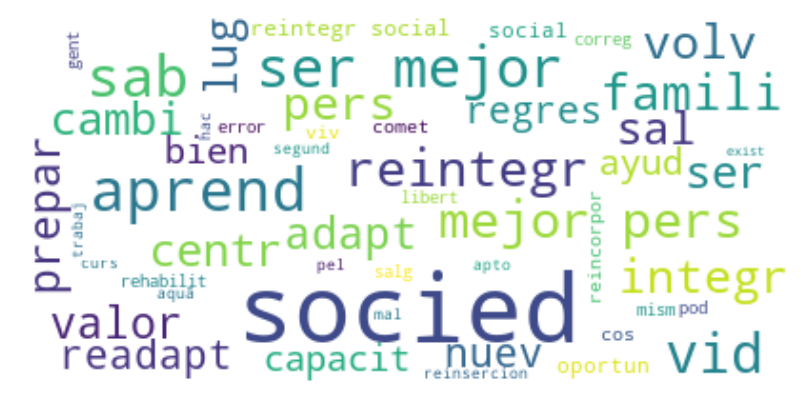

In [96]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("practica12.csv", header = None)
d.columns = ['ReinsercionSocial', 'ConsejosJovenes', 'OrganizacionesApoyo', 'PlanFuturoLibertad'] 

spa = stopwords.words("spanish")
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') 

reemplazos = []
n = len(d)
for r in range(n):
    original = d.ReinsercionSocial[r]
    reemplazo = ''
    if original != 'No Contesto':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]        
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
d['limpios'] = reemplazos

texto = ' '.join(reemplazos)
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(texto)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Para el caso de las respuestas de que conocen por "Reinserción Social", se ve en la imagen anterior que muchos hablan de **"readaptarse, familia, valores, integridad, sociedad, aprender, ser mejor, vida, mejor persona, ayuda, regresar"**, esto al parecer indica que tienen conocimientos sobre este tema.

Ahora se verá para respuestas sobre **Consejos a los jóvenes** que darían si tuvieran la oportunidad.


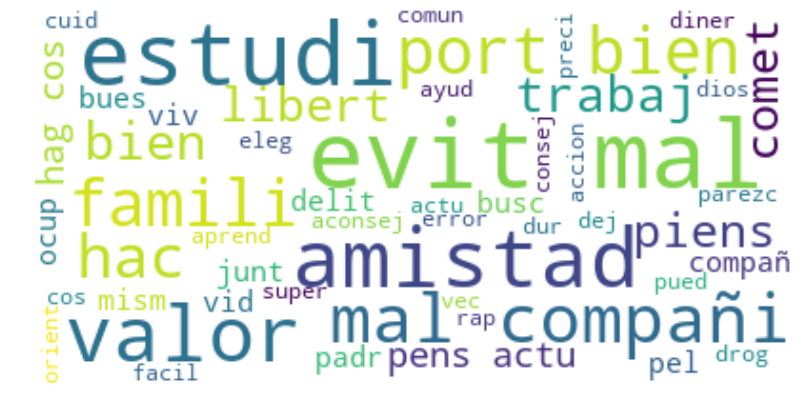

In [64]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("practica12.csv", header = None)
d.columns = ['ReinsercionSocial', 'ConsejosJovenes', 'OrganizacionesApoyo', 'PlanFuturoLibertad'] 

spa = stopwords.words("spanish")
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') 

reemplazos = []
n = len(d)
for r in range(n):
    original = d.ConsejosJovenes[r]
    reemplazo = ''
    if original != 'No Contesto':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]        
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
d['limpios'] = reemplazos

texto = ' '.join(reemplazos)
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(texto)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Por lo que muestra la imagen, los internos aconsejan a los jóvenes **"estudiar, evitar, mala compañía, valores, familia, amistad"** entre otros, donde se ve que la mayoría piensa en la amistad, las malas compañías y estudiar, con esto se puede valorar la posibilidad de ser estas las causas principales que pueden conllevar a cometer un delito.

Para los **"Planes futuros"** se analiza de igual modo que los anteriores.


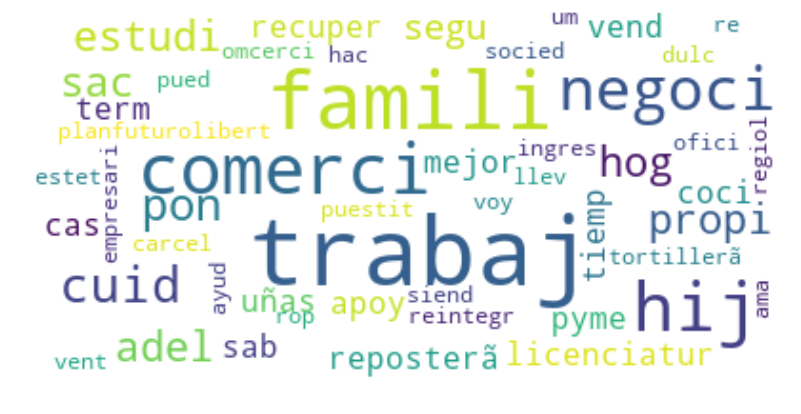

In [74]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("practica12.csv", header = None)
d.columns = ['ReinsercionSocial', 'ConsejosJovenes', 'OrganizacionesApoyo', 'PlanFuturoLibertad'] 

spa = stopwords.words("spanish")
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación

reemplazos = []
n = len(d)
for r in range(n):
    original = d.PlanFuturoLibertad[r]
    reemplazo = ''
    if original != 'No Contesto':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]        
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
d['limpios'] = reemplazos

texto = ' '.join(reemplazos)
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(texto)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Las respuestas de los internos a los planes futuros luego de quedar en libertad giran alrededor de **"trabajar, negocios, familia, hijos, hogar"** destacando la necesidad de los internos de volver a recuperar su trabajo y hogar.

Por último, se analiza si los internos tienen conocimientos sobre las organizaciones que existen para apoyarlos en su regreso a la sociedad. 

Para el caso de **"Organizaciones de apoyo"**.


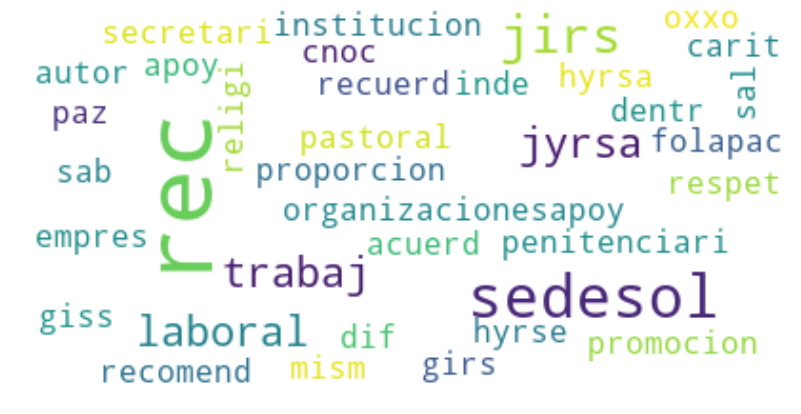

In [66]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("practica12.csv", header = None)
d.columns = ['ReinsercionSocial', 'ConsejosJovenes', 'OrganizacionesApoyo', 'PlanFuturoLibertad'] 

spa = stopwords.words("spanish")
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') 

reemplazos = []
n = len(d)
for r in range(n):
    original = d.OrganizacionesApoyo[r]
    reemplazo = ''
    if original != 'No Contesto':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]        
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
d['limpios'] = reemplazos

texto = ' '.join(reemplazos)
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(texto)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Se evidencia que conocen solamente **"Sedesol, Rece, Hyrse, Jyrsa"**, donde la más frecuente respuesta fue Sedesol. 

Con el uso de estas nuevas librerías de Python se pudo conocer un método para poder mostrar la información que se guarda en lenguaje natural en las bases de datos. Para este caso de estudio ayudó a conocer un poco el pensamiento de los internos con respecto a temas sobre la reinserción social. Se pudo visualizar la información que contienen algunas de las preguntas escritas a mano, permitiendo conocer los pensamientos de los internos con respecto a estos temas.
